# Random Forest Algorithm

             Random forest is a supervised learning algorithm which is used for both classification as well as regression.
But however,it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score

import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize']=8,8

# Loading the Data

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [3]:
df.shape

(56962, 30)

In [4]:
df.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [5]:
98/56962*100

0.17204452090867595

Since the data is heavily imbalanced we cannot use logistic regression.Tree based algorithm is very powerful in such scenario.

In [6]:
dep="Target"
ind=df.columns.tolist()
ind.remove(dep)
ind

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29']

# Building the Model

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(df[ind],df[dep],test_size=0.2,random_state=0,stratify=df[dep])
#We here use stratified sampling on our dependent variable.It ensures that the distribution of dependent variable
#remains same across train test split

In [8]:
print("               TRAIN")
print("--------------------------------------")
print(ytrain.value_counts())
print("               TEST")
print("--------------------------------------")
print(ytest.value_counts())

               TRAIN
--------------------------------------
0    45491
1       78
Name: Target, dtype: int64
               TEST
--------------------------------------
0    11373
1       20
Name: Target, dtype: int64


# Training the Model

In [9]:
model=RandomForestClassifier(n_estimators=50,random_state=0)
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting the Value

In [10]:
train_pred=model.predict(xtrain)
test_pred=model.predict(xtest)

In [11]:
accuracy_score(ytrain,train_pred)

0.9999780552568632

In [12]:
accuracy_score(ytest,test_pred)

0.9991222680593347

# Accuracy is not the good metric to evaluate such model since the dataset is heavily imbalance.

In [13]:
roc_auc_score(ytrain,train_pred)

0.9935897435897436

In [14]:
roc_auc_score(ytest,test_pred)

0.824868108678449

In [15]:
confusion_matrix(ytrain,train_pred)

array([[45491,     0],
       [    1,    77]], dtype=int64)

In [16]:
confusion_matrix(ytest,test_pred)

array([[11370,     3],
       [    7,    13]], dtype=int64)

# Variable Importance

In [17]:
features = xtrain.columns
importances = model.feature_importances_
indices = np.argsort(importances)

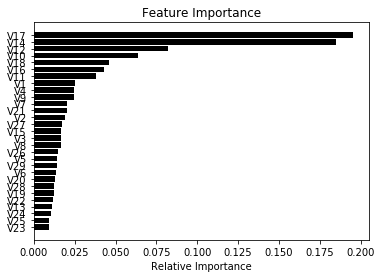

In [18]:
plt.title('Feature Importance')
plt.barh(range(len(indices)),importances[indices],color='black',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()